# Answers to Lab 3
## 95-791 Data Mining (Fall 2021) 
### Name: Abdullah Ahmad
#### Date: Friday, November 19th, 2021



### Changing the author field and file name.

 (a) Change the `name:` field on the Jupyter Notebook to your own name.

 (b) Rename this file to "Lab3_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.



### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code

You might need to run the following commands in your terminal for all libraries to work:
    
    - conda install -c anaconda graphviz
    - conda install -c anaconda pydotplus
    - conda install -c anaconda pydot


In [2]:
!pip install graphviz
!pip install pydotplus
!pip install pydot 
!pip install dtreeviz


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import pydot
import graphviz
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from dtreeviz.trees import dtreeviz
#from dtreeviz.trees import *
from sklearn.datasets import load_boston
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
%matplotlib inline
plt.style.use('seaborn-white')
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score


---

### 1. Warm-up

> For Lab you might want to have your lecture slides and the ISRL textbook (An Introduction to Statistical Learning) open (Chapters 4 and 8) as you go through the exercises. 


**1)a) Load the boston dataset that we saw in the previous homework and print its DESCR**


In [4]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = pd.Series(boston.target)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df['MEDV'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**1)b) Split your dataframe into `X` and `y`. Subset your X to just include `LSTAT` and `CRIM` as your features, and print out this subset.**

In [9]:
Y = df.pop("MEDV")
X = df[['LSTAT','CRIM']]
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

**1)d) Do a 20-80 ratio (to separate into training and testing) in your split, and print out your y_test.**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

---

### 2. Fitting Decision Trees - Regression

**2)a) We will start by creating a Decision Tree for our dataset (using the train and testing datasets we previously created). Read the documentation below and fit your data to regression decision tree.**

Scikitlearn has excellent documentation on Decision Trees [here](https://scikit-learn.org/dev/modules/tree.html#) and [here](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

For this specific excersice we are going to use a [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor). Similar to other models we've implemented with scikitlearn, start by creating an object of the model class (DecisionTreeRegressor), and fit your X_train and y_train to it.


In [8]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

**2)b) Print your tree as text. For this you want to use [`tree.export_text`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html). How much did your tree grow? (a lot?!) Be sure to provide feature_name so that you can interpret the tree.**

In [9]:
from sklearn.tree import export_text
r = export_text(reg,feature_names=['CRIM','LSAT'])
print(r)

|--- CRIM <= 7.68
|   |--- CRIM <= 4.65
|   |   |--- LSAT <= 0.48
|   |   |   |--- CRIM <= 4.15
|   |   |   |   |--- LSAT <= 0.02
|   |   |   |   |   |--- CRIM <= 3.56
|   |   |   |   |   |   |--- LSAT <= 0.02
|   |   |   |   |   |   |   |--- CRIM <= 3.04
|   |   |   |   |   |   |   |   |--- value: [50.00]
|   |   |   |   |   |   |   |--- CRIM >  3.04
|   |   |   |   |   |   |   |   |--- CRIM <= 3.13
|   |   |   |   |   |   |   |   |   |--- value: [44.00]
|   |   |   |   |   |   |   |   |--- CRIM >  3.13
|   |   |   |   |   |   |   |   |   |--- value: [50.00]
|   |   |   |   |   |   |--- LSAT >  0.02
|   |   |   |   |   |   |   |--- value: [42.30]
|   |   |   |   |   |--- CRIM >  3.56
|   |   |   |   |   |   |--- value: [31.60]
|   |   |   |   |--- LSAT >  0.02
|   |   |   |   |   |--- CRIM <= 3.53
|   |   |   |   |   |   |--- CRIM <= 3.23
|   |   |   |   |   |   |   |--- CRIM <= 3.00
|   |   |   |   |   |   |   |   |--- CRIM <= 2.90
|   |   |   |   |   |   |   |   |   |--- CRIM <= 2.4

**2)c) Use the [`cross_val_score`] to report your mean CV score, and its standard deviation. Use a k=10. How good is this score?** 

In [10]:
print("CV Score mean",cross_val_score(reg, X, Y, cv=10).mean())
variance = sum([((x - cross_val_score(reg, X, Y, cv=10).mean()) ** 2) for x in cross_val_score(reg, X, Y, cv=10)]) / len(cross_val_score(reg, X, Y, cv=10))
res = variance ** 0.5
print("CV Score std dev",str(res))
print("R Squared",reg.score(X_test,y_test))


CV Score mean -0.5316302100761381
CV Score std dev 0.9735481856576385
R Squared 0.4201173772600032


**2)d) Repeat 2)a) but limit your tree to `max_leaf_nodes=10`. Print the mean CV score for this new model. Did your model improve?**


In [11]:
reg_2 = DecisionTreeRegressor(random_state=0,max_leaf_nodes=10)
reg_2.fit(X_train, y_train)



DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [12]:
print("CV Score",cross_val_score(reg_2, X, Y, cv=10).mean())
print("R Squared",reg_2.score(X_test,y_test))


CV Score -0.13951210352561444
R Squared 0.5606985799839135


Both the MSE and R-squared improved.

---

# Visualizing Decision Trees

In this section we will look at different way of plotting our Decision Trees. Please continue using the model you already trained.


**3)a)The first and easiest way to visualize our Decision Tree is with [tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) from sckitlearn.**

plot_tree = tree.plot_tree(your_model, feature_names=[])

Go ahead and try this function on your model!

[Text(177.24705882352941, 195.696, 'CRIM <= 7.685\nmse = 86.938\nsamples = 404\nvalue = 22.666'),
 Text(98.47058823529412, 152.208, 'CRIM <= 4.65\nmse = 79.539\nsamples = 119\nvalue = 32.429'),
 Text(59.082352941176474, 108.72, 'LSAT <= 0.484\nmse = 55.496\nsamples = 41\nvalue = 40.412'),
 Text(39.38823529411765, 65.232, 'CRIM <= 4.15\nmse = 49.643\nsamples = 32\nvalue = 38.45'),
 Text(19.694117647058825, 21.744, 'mse = 49.325\nsamples = 25\nvalue = 40.136'),
 Text(59.082352941176474, 21.744, 'mse = 4.371\nsamples = 7\nvalue = 32.429'),
 Text(78.7764705882353, 65.232, 'mse = 13.941\nsamples = 9\nvalue = 47.389'),
 Text(137.85882352941178, 108.72, 'CRIM <= 5.165\nmse = 41.063\nsamples = 78\nvalue = 28.232'),
 Text(118.16470588235295, 65.232, 'mse = 45.753\nsamples = 12\nvalue = 33.283'),
 Text(157.5529411764706, 65.232, 'mse = 34.727\nsamples = 66\nvalue = 27.314'),
 Text(256.02352941176474, 152.208, 'CRIM <= 14.805\nmse = 33.62\nsamples = 285\nvalue = 18.59'),
 Text(216.63529411764708,

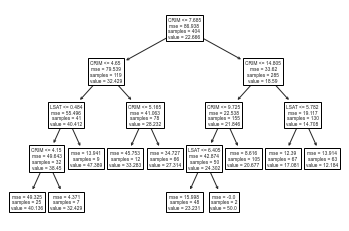

In [13]:
tree.plot_tree(reg_2,feature_names=['CRIM','LSAT'])

**3)b)Guess what? You can export the previous tree plot to an image. Follow the steps below to achieve it.**

- We first use [tree.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) from sckitlearn to obtain the text data of our tree and export it to a graphviz format.

> tree_data = tree.export_graphviz(your_tree, out_file=None, 
                                feature_names=[],  
                                filled=True)
                                
- We use [graphviz](https://graphviz.readthedocs.io/en/stable/manual.html) - a graph-drawing software - to draw our tree and [format](https://graphviz.readthedocs.io/en/stable/api.html?highlight=source#source) it into an image type file (e.g. 'png').


> graph = graphviz.Source(tree_data, format="png") 

> graph #you can view the graph created

- We render the graph! This prints out a image type file.

> graph.render("name_your_file.png")

Go ahead and try this on your model!

In [14]:
#prepare tree_data
#your code here

#source it with graphviz and view the graph
#your code here

tree_data = tree.export_graphviz(reg_2, out_file=None, feature_names=['CRIM','LSAT'],
filled=True)

graph = graphviz.Source(tree_data, format="png")

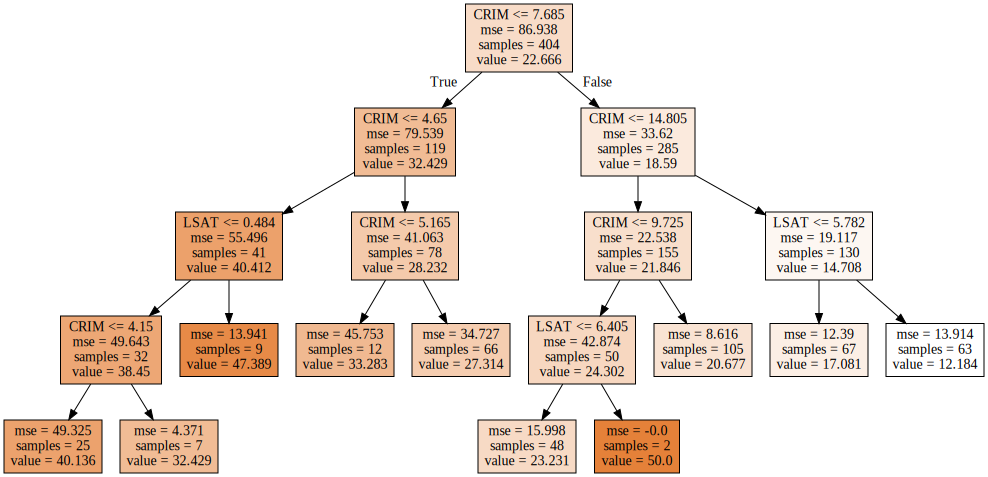

In [15]:
graph.render("Regressor_tree_2.png")
graph

**3)c)We are going try one more python library that can help us draw and understand our trees. The [dtreesviz](https://github.com/parrt/dtreeviz) is a fairly new library, but its based off scikit-learn. Why do you think this might be useful?**
Look at the code below and fill in the missing parts.



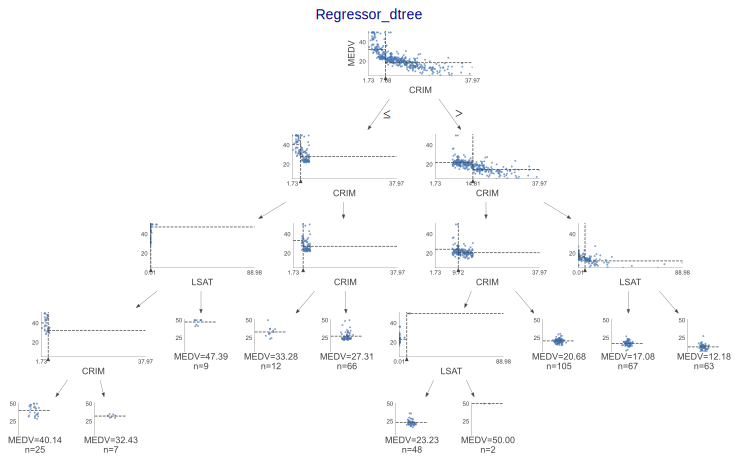

In [16]:
viz = dtreeviz(reg_2, X_train, y_train,
               target_name='MEDV',
               feature_names=['CRIM','LSAT'],
               title='Regressor_dtree',
               fontname="Arial",
               title_fontsize=14,
               colors = {"title":"darkblue"},
              scale=1)

viz

**3)d)Let's now repeat the process with all the variables in your dataset. You will need to encode your categorical variables (show below), split into training and testing again, and retrain your Regression tree.**


In [17]:


X_all = df
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, Y, test_size=0.2, random_state=8)

reg_3 = DecisionTreeRegressor(random_state=0,max_leaf_nodes=10)
reg_3.fit(X_train_all,y_train_all)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

**3)e)Use one of the methods from a) to c), to plot your decision tree.**

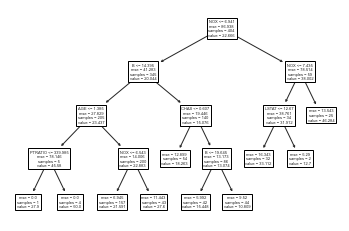

In [18]:
plot_tree = tree.plot_tree(reg_3, feature_names=['LSTAT','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'])


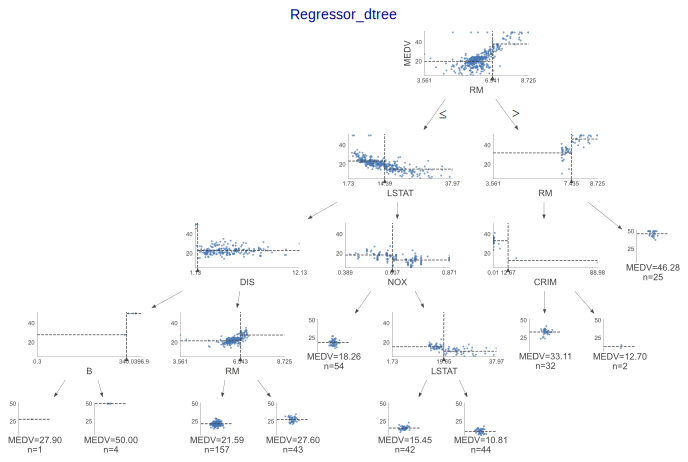

In [19]:
viz = dtreeviz(reg_3, X_train_all, y_train_all,
               target_name='MEDV',
               feature_names=boston.feature_names,
               title='Regressor_dtree',
               fontname="Arial",
               title_fontsize=14,
               colors = {"title":"darkblue"},
              scale=1)

viz

**3)f)Now that you have a single decision Tree, let's try a [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)! Import the package below and follow the instructions.**

* Create a RandomForestRegressor object with max_depth=30 and a random_state=1
* fit your model with your train dataset
* From here you can make predictions and get the scores for both your train and test datasets.
* Use the .score on your test dataset

What is the $R^2$ of your test? Is it better than your previous decision tree?


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [21]:
rf_regressor = RandomForestRegressor(max_depth=30, random_state=1)
rf_regressor.fit(X_train_all, y_train_all)



RandomForestRegressor(max_depth=30, random_state=1)

In [22]:
print("CV Score for Random Forest",cross_val_score(rf_regressor, X_all, Y, cv=10).mean())

print("R Squared Test",rf_regressor.score(X_test_all,y_test_all))
print("R Squared Train",rf_regressor.score(X_train_all,y_train_all))

CV Score for Random Forest 0.49250936462166733
R Squared Test 0.7749010373536029
R Squared Train 0.9858605294883702


**3)g)In class we mentioned that RF lost interpretability, but we are able to calculate feature importances from them. There were two approaches we discussed for this. Take a look at these two approaches [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html). Follow the steps below.**

* Obtain the feature importances from your RF (3)f))
    * These were already calculated for you, you just need to extract them: rf.feature_importances_
* Create a dataframe of features in one column, and feature importances in a second column.
* Plot the features vs importances.
    * This can be as simple as a seaborn barplot. You can even go the extra mile ordering the results.

In [23]:
rf_reg =pd.DataFrame(columns=['Features','Feature_importance'])

rf_reg['Feature_importance'] = rf_regressor.feature_importances_
rf_reg['Features'] = boston.feature_names
rf_reg = rf_reg.sort_values(by=['Feature_importance'])
print(rf_reg)

   Features  Feature_importance
3      CHAS            0.000557
1        ZN            0.000682
8       RAD            0.002011
2     INDUS            0.005265
9       TAX            0.009336
11        B            0.010255
10  PTRATIO            0.011165
6       AGE            0.015002
4       NOX            0.020666
0      CRIM            0.026313
7       DIS            0.066096
5        RM            0.349709
12    LSTAT            0.482945


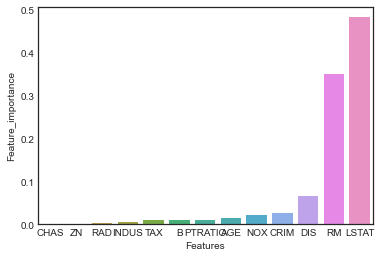

In [24]:
import seaborn as sns

ax = sns.barplot(x='Features', y="Feature_importance", data=rf_reg)

--- 

# Classification Trees

For classification trees we need another dataset. In this case we can use the wine dataset (from scikit-learn, we have used it before in HW2).

**4)a)Load your wine dataset from Homework 2. Print its description**

In [25]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.DESCR

X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
Y_wine = pd.Series(wine.target)


**4)b)Split into training and testing datasets, with a 80-20 ratio, and random_state=1.**

In [26]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, Y_wine, test_size=0.2, random_state=1)

**4)c)We now need to train a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Create a DecisionTreeClassifier object and then fit your train dataset.**

In [27]:
dec_clf = DecisionTreeClassifier(random_state=0)
dec_clf.fit(X_train_wine,y_train_wine)

DecisionTreeClassifier(random_state=0)

**4)d)How well did your Decision Tree Classifier perform? Print out its classification report.**

In [28]:
from sklearn.metrics import accuracy_score

y_pred_wine_tree = dec_clf.predict(X_test_wine)

print("Accuracy is",accuracy_score(y_test_wine, y_pred_wine_tree)) 
print(confusion_matrix(y_test_wine, y_pred_wine_tree))
print(classification_report(y_test_wine, y_pred_wine_tree))

Accuracy is 0.9166666666666666
[[13  1  0]
 [ 1 12  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.86      0.92      0.89        13
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



--> Your answer here

**4)e)Use tree.plot_tree (section 3) to visualize your tree.**

[Text(167.4, 199.32, 'proline <= 755.0\ngini = 0.657\nsamples = 142\nvalue = [45, 58, 39]'),
 Text(83.7, 163.07999999999998, 'flavanoids <= 1.235\ngini = 0.48\nsamples = 89\nvalue = [1, 55, 33]'),
 Text(41.85, 126.83999999999999, 'color_intensity <= 3.56\ngini = 0.165\nsamples = 33\nvalue = [0, 3, 30]'),
 Text(20.925, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(62.775000000000006, 90.6, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]'),
 Text(125.55000000000001, 126.83999999999999, 'hue <= 0.645\ngini = 0.135\nsamples = 56\nvalue = [1, 52, 3]'),
 Text(104.625, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(146.475, 90.6, 'malic_acid <= 3.925\ngini = 0.037\nsamples = 53\nvalue = [1, 52, 0]'),
 Text(125.55000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(167.4, 54.359999999999985, 'malic_acid <= 4.14\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(146.475, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]

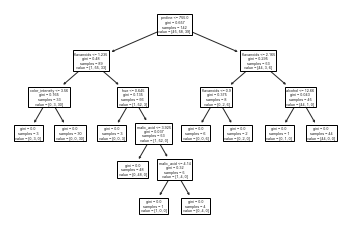

In [29]:
tree.plot_tree(dec_clf,feature_names=wine.feature_names)

**4)e) Now that you have a single decision Tree, let's try a [random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)! Import the package below and follow the instructions.**

* Create a RandomForestClassifier object with n_estimators=500 and a random_state=1
* fit your model with your train dataset
* From here you can make predictions and get the scores for both your train and test datasets.
* Use the .score on your test dataset

What is the test accuracy?


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_forest_clf = RandomForestClassifier(n_estimators=500, random_state=1)
random_forest_clf.fit(X_train_wine,y_train_wine)
y_pred_wine_rf = random_forest_clf.predict(X_test_wine)

print("Score for train",random_forest_clf.score(X_train_wine,y_train_wine))
print("Score for test",random_forest_clf.score(X_test_wine,y_test_wine))

Score for train 1.0
Score for test 0.9722222222222222


**4)f) Print a classification report with your previous RandomForest Classifier. This will allow you to see how well it predicted each class.**

In [32]:
print(confusion_matrix(y_test_wine, y_pred_wine_rf))
print(classification_report(y_test_wine, y_pred_wine_rf))

[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



**4)g)Repeat the steps from 3)g) to plot the feature importance for this model. What is your most important feature?**

In [33]:
rf_classifier =pd.DataFrame(columns=['Features','Feature_importance'])

rf_classifier['Feature_importance'] = random_forest_clf.feature_importances_
rf_classifier['Features'] = wine.feature_names
rf_classifier = rf_classifier.sort_values(by=['Feature_importance'])
print(rf_classifier)

                        Features  Feature_importance
7           nonflavanoid_phenols            0.010816
2                            ash            0.015996
8                proanthocyanins            0.017486
3              alcalinity_of_ash            0.025245
4                      magnesium            0.031063
1                     malic_acid            0.040078
5                  total_phenols            0.064850
10                           hue            0.089735
11  od280/od315_of_diluted_wines            0.109811
0                        alcohol            0.112509
9                color_intensity            0.137384
6                     flavanoids            0.157839
12                       proline            0.187187


[Text(0, 0, 'nonflavanoid_phenols'),
 Text(1, 0, 'ash'),
 Text(2, 0, 'proanthocyanins'),
 Text(3, 0, 'alcalinity_of_ash'),
 Text(4, 0, 'magnesium'),
 Text(5, 0, 'malic_acid'),
 Text(6, 0, 'total_phenols'),
 Text(7, 0, 'hue'),
 Text(8, 0, 'od280/od315_of_diluted_wines'),
 Text(9, 0, 'alcohol'),
 Text(10, 0, 'color_intensity'),
 Text(11, 0, 'flavanoids'),
 Text(12, 0, 'proline')]

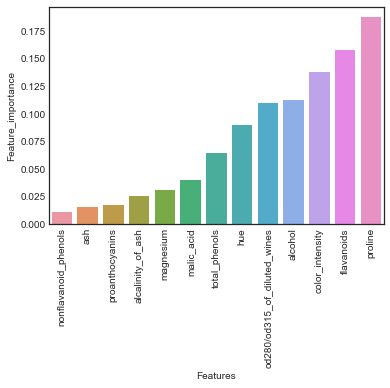

In [34]:
import seaborn as sns

ax = sns.barplot(x='Features', y="Feature_importance", data=rf_classifier)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

---

### END OF LAB 3!
